# **Libraries**

In [38]:
import io
import os
from pathlib import Path
from PIL import Image 

import h5py
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
path = Path("analyze.ipynb")
project_path = str(path.parent.absolute().parent)

# **Functions**

In [45]:
def read_csv(path: str) -> pd.DataFrame:
    return pd.read_csv(os.path.join(project_path, path))

def read_image(image_name: str) -> Image:
    with h5py.File(os.path.join(project_path, r"data\raw", "train-image.hdf5"), "r") as f:
        im = Image.open(io.BytesIO(f[image_name][()]))
    return im

# **Load Data**

In [8]:
train_df = read_csv("data\\raw\\train-metadata.csv")
test_df = read_csv("data\\raw\\test-metadata.csv")
sample_submission_df = read_csv("data\\raw\\sample_submission.csv")

C:\Users\Acer\AppData\Local\Temp\ipykernel_15108\3344466794.py:2: DtypeWarning: Columns (51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(os.path.join(project_path, path))


In [9]:
train_df.shape

(401059, 55)

In [10]:
train_df.columns

Index(['isic_id', 'target', 'patient_id', 'age_approx', 'sex',
       'anatom_site_general', 'clin_size_long_diam_mm', 'image_type',
       'tbp_tile_type', 'tbp_lv_A', 'tbp_lv_Aext', 'tbp_lv_B', 'tbp_lv_Bext',
       'tbp_lv_C', 'tbp_lv_Cext', 'tbp_lv_H', 'tbp_lv_Hext', 'tbp_lv_L',
       'tbp_lv_Lext', 'tbp_lv_areaMM2', 'tbp_lv_area_perim_ratio',
       'tbp_lv_color_std_mean', 'tbp_lv_deltaA', 'tbp_lv_deltaB',
       'tbp_lv_deltaL', 'tbp_lv_deltaLB', 'tbp_lv_deltaLBnorm',
       'tbp_lv_eccentricity', 'tbp_lv_location', 'tbp_lv_location_simple',
       'tbp_lv_minorAxisMM', 'tbp_lv_nevi_confidence', 'tbp_lv_norm_border',
       'tbp_lv_norm_color', 'tbp_lv_perimeterMM',
       'tbp_lv_radial_color_std_max', 'tbp_lv_stdL', 'tbp_lv_stdLExt',
       'tbp_lv_symm_2axis', 'tbp_lv_symm_2axis_angle', 'tbp_lv_x', 'tbp_lv_y',
       'tbp_lv_z', 'attribution', 'copyright_license', 'lesion_id',
       'iddx_full', 'iddx_1', 'iddx_2', 'iddx_3', 'iddx_4', 'iddx_5',
       'mel_mitotic_index', '

<HDF5 dataset "ISIC_0015670": shape (), type "|S3325">


# **Data Analysis**

### **Description**

**isic**: Unique case identifier. </br>
**target**: Binary class {0: benign, 1: malignant}. </br>
**patient_id**: Unique patient identifier. </br>
**age_approx**: Approximate age of patient at time of imaging. </br>
**sex**: Sex of the person. </br>
**anatom_site_general**: Location of the lesion on the patient's body. </br>
**clin_size_long_diam_mm**: Maximum diameter of the lesion (mm).+ </br>
**image_type**: Structured field of the ISIC Archive for image type. </br>
**tbp_tile_type**: Lighting modality of the 3D TBP source image. </br>
**tbp_lv_A**: A inside lesion.+ </br>
**tbp_lv_Aext**: A outside lesion.+ </br>
**tbp_lv_B**: B inside lesion.+ </br>
**tbp_lv_Bext**: B outside lesion.+ </br>
**tbp_lv_C**: Chroma inside lesion.+ </br>
**tbp_lv_Cext**: Chroma outside lesion.+ </br>
**tbp_lv_H**: Hue inside the lesion; calculated as the angle of A* and B* in LAB* color space. Typical values range from 25 (red) to 75 (brown).+ </br>
**tbp_lv_Hext**: Hue outside lesion.+ </br>
**tbp_lv_L**: L inside lesion.+ </br>
**tbp_lv_Lext**: L outside lesion.+ </br>
**tbp_lv_areaMM2**: Area of lesion (mm^2).+ </br>
**tbp_lv_area_perim_ratio**: Border jaggedness, the ratio between lesions perimeter and area. Circular lesions will have low values; irregular shaped lesions will have higher values. Values range 0-10.+ </br>
**tbp_lv_color_std_mean**: Color irregularity, calculated as the variance of colors within the lesion's boundary. </br>
**tbp_lv_deltaA**: Average A contrast (inside vs. outside lesion).+ </br>
**tbp_lv_deltaB**: Average B contrast (inside vs. outside lesion).+ </br>
**tbp_lv_deltaL**: Average L contrast (inside vs. outside lesion).+ </br>
**tbp_lv_deltaLB**: </br>
**tbp_lv_deltaLBnorm**: Contrast between the lesion and its immediate surrounding skin. Low contrast lesions tend to be faintly visible such as freckles; high contrast lesions tend to be those with darker pigment. Calculated as the average delta LB of the lesion relative to its immediate background in LAB* color space. Typical values range from 5.5 to 25.+ </br>
**tbp_lv_eccentricity**: Eccentricity.+ </br>
**tbp_lv_location**: Classification of anatomical location, divides arms & legs to upper & lower; torso into thirds.+ </br>
**tbp_lv_location_simple**: Classification of anatomical location, simple.+ </br>
**tbp_lv_minorAxisMM**: Smallest lesion diameter (mm).+ </br>
**tbp_lv_nevi_confidence**: Nevus confidence score (0-100 scale) is a convolutional neural network classifier estimated probability that the lesion is a nevus. The neural network was trained on approximately 57,000 lesions that were classified and labeled by a dermatologist.+,++ </br>
tbp_lv_norm_border: Border irregularity (0-10 scale); the normalized average of border jaggedness and asymmetry.+ </br>
**tbp_lv_norm_color**: Color variation (0-10 scale); the normalized average of color asymmetry and color irregularity.+ </br>
**tbp_lv_perimeterMM**: Perimeter of lesion (mm).+ </br>
**tbp_lv_radial_color_std_max**: </br>
**tbp_lv_stdL**: Color asymmetry, a measure of asymmetry of the spatial distribution of color within the lesion. This score is calculated by looking at the average standard deviation in LAB* color space within concentric rings originating from the lesion center. Values range 0-10.+ </br>
**tbp_lv_stdLExt**: Standard deviation of L outside lesion.+ </br>
**tbp_lv_symm_2axis**: Border asymmetry; a measure of asymmetry of the lesion's contour about an axis perpendicular to the lesion's most symmetric axis. Lesions with two axes of symmetry will therefore have low scores (more symmetric), while lesions with only one or zero axes of symmetry will have higher scores (less symmetric). This score is calculated by comparing opposite halves of the lesion contour over many degrees of rotation. The angle where the halves are most similar identifies the principal axis of symmetry, while the second axis of symmetry is perpendicular to the principal axis. Border asymmetry is reported as the asymmetry value about this second axis. Values range 0-10.+ </br>
**tbp_lv_symm_2axis_angle**: Lesion border asymmetry angle.+ </br>
**tbp_lv_x**: X-coordinate of the lesion on 3D TBP.+ </br>
**tbp_lv_y**: Y-coordinate of the lesion on 3D TBP.+ </br>
**tbp_lv_z**: Z-coordinate of the lesion on 3D TBP.+ </br>
**attribution**: Image attribution, synonymous with image source. </br>
**copyright_license**: Copyright license. </br>
**lesion_id**: Unique lesion identifier. Present in lesions that were manually tagged as a lesion of interest. </br>
**iddx_full**: Fully classified lesion diagnosis. </br>
**iddx_1**: First level lesion diagnosis. </br>
**iddx_2**: Second level lesion diagnosis. </br>
**iddx_3**: Third level lesion diagnosis. </br>
**iddx_4**: Fourth level lesion diagnosis. </br>
**iddx_5**: Fifth level lesion diagnosis. </br>
**mel_mitotic_index**: Mitotic index of invasive malignant melanomas. </br>
**mel_thick_mm**: Thickness in depth of melanoma invasion. </br>
tbp_lv_dnn_lesion_confidence: Lesion confidence score (0-100 scale).+ </br>
'+ D’Alessandro, B. "Methods and apparatus for identifying skin features of interest." US Patent #11,164,670. (2021). </br>

### **Insights**

##### **Target**

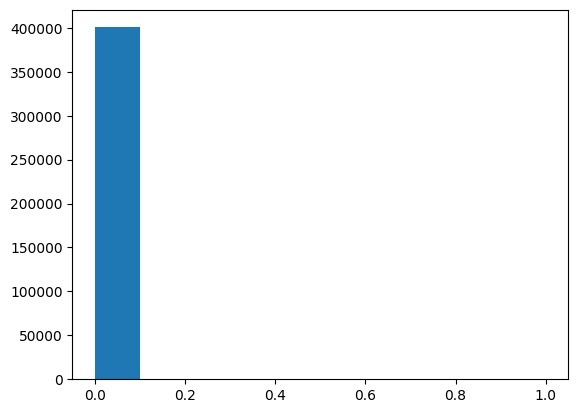

In [12]:
plt.hist(train_df['target'])
plt.show()

Too few cancerous patiences </br>

##### **Age**

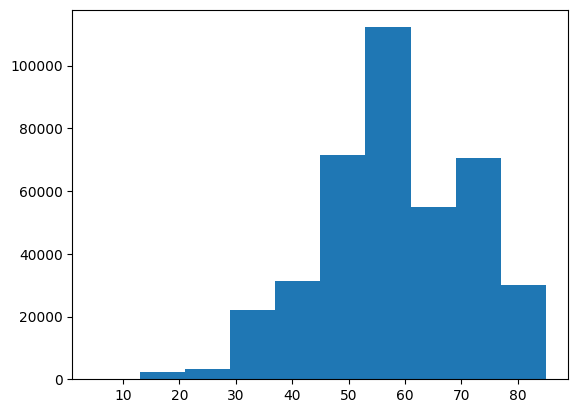

In [13]:
plt.hist(train_df['age_approx'])
plt.show()

Most participiants are 50-60 years old </br>

##### **Anatom site general**

In [14]:
train_df['anatom_site_general'].unique()

array(['lower extremity', 'head/neck', 'posterior torso',
       'anterior torso', 'upper extremity', nan], dtype=object)

In [15]:
train_df['anatom_site_general'].isna().sum()

5756

Have 6 values: 
&nbsp;&nbsp;&nbsp;&nbsp;- Lower extremity: Hip, Thigh, Knee, Leg, Ankle, and Foot </br>
&nbsp;&nbsp;&nbsp;&nbsp;- Head/neck: Head and Neck </br>
&nbsp;&nbsp;&nbsp;&nbsp;- Posterior torso: Back </br>
&nbsp;&nbsp;&nbsp;&nbsp;- Anterior torso: Front </br>
&nbsp;&nbsp;&nbsp;&nbsp;- Upper extremity: Arm, Forearm, Writst, and Hand </br>
&nbsp;&nbsp;&nbsp;&nbsp;- NaN: not identify yet </br>
5756 values are nan (around 1.5%) </br>

##### **Clin size long diam mm**

<Axes: >

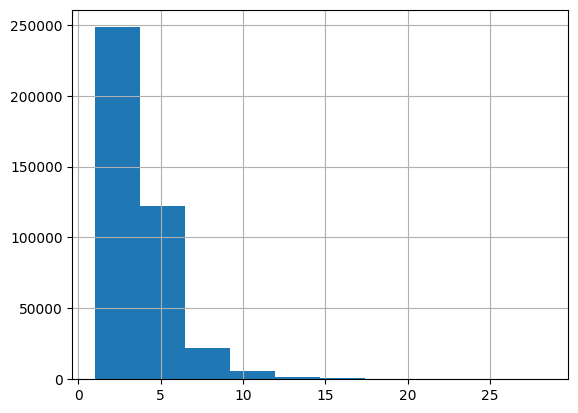

In [16]:
train_df['clin_size_long_diam_mm'].hist()

The examine area is still mostly ranges from 0.2 to 0.4 </br>

##### **Image Type**

In [17]:
train_df['image_type'].unique()

array(['TBP tile: close-up'], dtype=object)

Only one so I shouldn't care about it </br>

##### **TBP tile type**

In [18]:
train_df['tbp_tile_type'].unique()

array(['3D: white', '3D: XP'], dtype=object)

In [52]:
print("Total amount of white type:", train_df[train_df['tbp_tile_type'] == '3D: white'].shape)
print("Total amount of white type:", train_df[train_df['tbp_tile_type'] == '3D: XP'].shape)

Total amount of white type: (115156, 55)
Total amount of white type: (285903, 55)


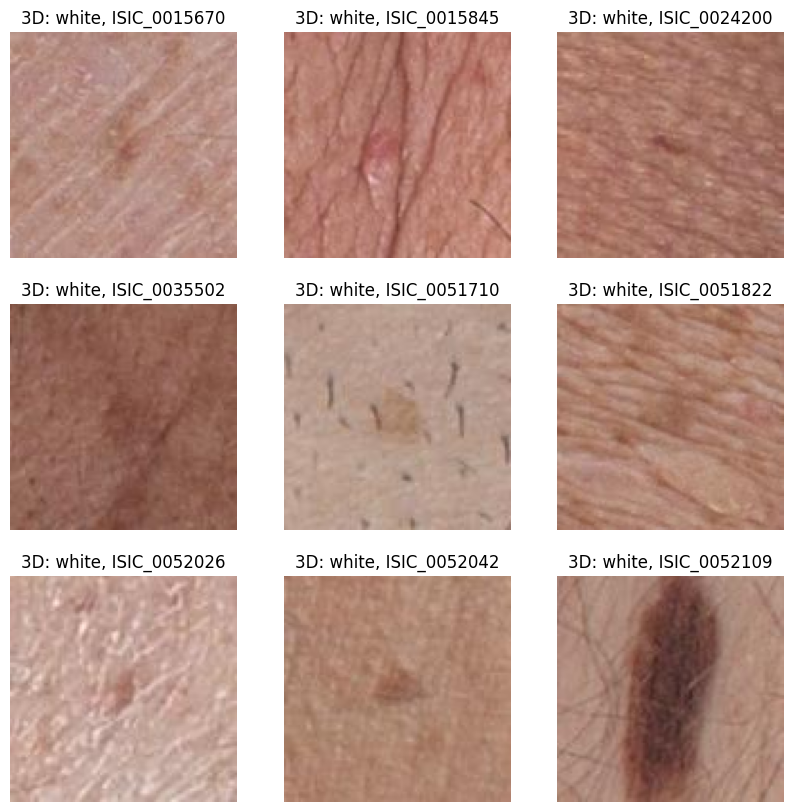

In [58]:
plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    image_id = train_df[train_df['tbp_tile_type'] == '3D: white']['isic_id'].iloc[i]
    image = read_image(image_id)
    plt.imshow(image)
    plt.title(f"3D: white, {image_id}")
    plt.axis("off")

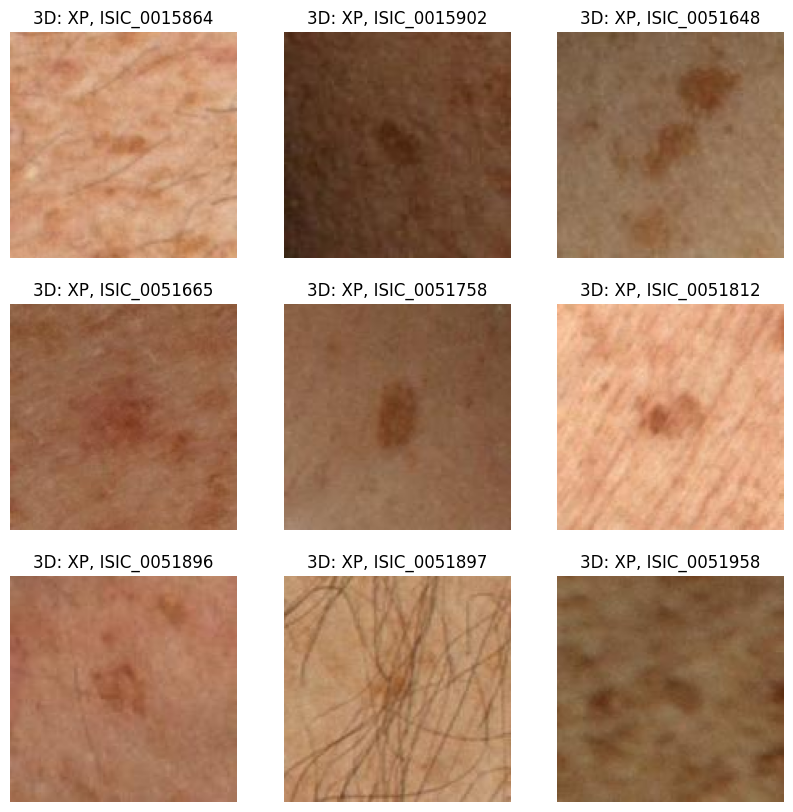

In [59]:
plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    image_id = train_df[train_df['tbp_tile_type'] == '3D: XP']['isic_id'].iloc[i]
    image = read_image(image_id)
    plt.imshow(image)
    plt.title(f"3D: XP, {image_id}")
    plt.axis("off")

Ratio between white and XP is 29:71

##### **tbp_lv_A**

# **Evaluation**

In [23]:
import numpy as np
from sklearn import metrics
y = np.array([1, 1, 2, 2])
pred = np.array([0.1, 0.4, 0.35, 0.8])
fpr, tpr, thresholds = metrics.roc_curve(y, pred, pos_label=2)
metrics.auc(fpr, tpr)

0.75

In [24]:
thresholds

array([ inf, 0.8 , 0.4 , 0.35, 0.1 ])

### **ROC and AUC**

ROC is the graph where x is false positive rate (FPR) and y is true positive rate (TPR) </br>
FPR = (false positive) / (false positive + true negative) </br>
TPR = (true positive) / (true positive + false negative) </br>
threshold r: </br>
&nbsp;&nbsp;&nbsp;&nbsp;- If probability p > r then class 2 (positive) </br>
&nbsp;&nbsp;&nbsp;&nbsp;- If probability p <= r then class 1 (negative) </br>


Let's suppose that the true labels = [1, 1, 2, 2], the prediction probability is [0.1, 0.4, 0.35, 0.8], and the thresholds is [inf, 0.8, 0.4, 0.35, 0.1] </br>

Case 1: threshold = 0.8 </br>
The predicted labels will be [1, 1, 1, 1]
The confusing matrix will be: </br>
&nbsp;&nbsp;&nbsp;&nbsp;0&nbsp;0 </br>
&nbsp;&nbsp;&nbsp;&nbsp;2&nbsp;2 </br>
TPR = 0 </br>
FPR = 0 </br>

Case 2: threshold = 0.4 </br>
The predicted labels will be [1, 1, 1, 2]
The confusing matrix will be: </br>
&nbsp;&nbsp;&nbsp;&nbsp;1&nbsp;0 </br>
&nbsp;&nbsp;&nbsp;&nbsp;1&nbsp;2 </br>
TPR = 0.5 </br>
FPR = 0 </br>

Case 3: threshold = 0.35 </br>
The predicted labels will be [1, 2, 1, 2]
The confusing matrix will be: </br>
&nbsp;&nbsp;&nbsp;&nbsp;1&nbsp;1 </br>
&nbsp;&nbsp;&nbsp;&nbsp;1&nbsp;1 </br>
TPR = 0.5 </br>
FPR = 0.5 </br>

Case 4: threshold = 0.1 </br>
The predicted labels will be [1, 2, 2, 2]
The confusing matrix will be: </br>
&nbsp;&nbsp;&nbsp;&nbsp;2&nbsp;1 </br>
&nbsp;&nbsp;&nbsp;&nbsp;0&nbsp;1 </br>
TPR = 1 </br>
FPR = 0.5 </br>

case 5: threshold = inf </br>
The predicted labels will be [1, 1, 1, 1]
The confusing matrix will be: </br>
&nbsp;&nbsp;&nbsp;&nbsp;0&nbsp;0 </br>
&nbsp;&nbsp;&nbsp;&nbsp;2&nbsp;2 </br>
TPR = 0 </br>
FPR = 0 </br>

So the TPRs = [0, 0, 0.5, 0.5, 1], FPRs = [0, 0, 0, 0.5, 0.5]

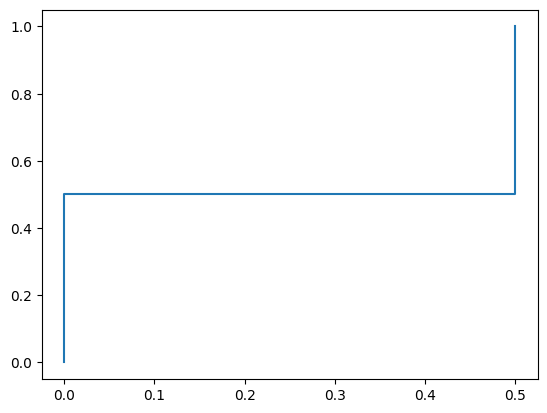

In [25]:
tprs = [0, 0, 0.5, 0.5, 1]
fprs = [0, 0, 0, 0.5, 0.5]

plt.plot(fprs, tprs)
plt.show()

I doubt that sklearn thresholds miss 0
If 0 in thresholds, the AUC (Area under the curve) will be 1/2 + 1/4 = 0.75